In [2]:
# Imports
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
from shapely.ops import linemerge, Point
from shapely.errors import ShapelyDeprecationWarning
import warnings
import pickle
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
#from importnb import Notebook
from preprocessing import preprocess
from collections import Counter
from paris_methods import duplicate_processing, duplicate_final, assign_gridnumber, translate_geopoints, create_grid
import pyproj


In [3]:
FinalUnique = pd.read_pickle("data/FinalUnique.pkl")
FinalUnique = gpd.GeoDataFrame(FinalUnique, geometry = "geometry") 
FinalUnique = FinalUnique.drop(columns=["buffer", "filter"])

In [5]:
gridX, gridY = create_grid(5,5,FinalUnique)
assign_gridnumber(FinalUnique, gridX, gridY)


KeyError: 'centroid'

In [ ]:
matrix = FinalUnique.plot(column='grid',cmap='prism')
cx.add_basemap(matrix, crs=FinalUnique.crs.to_string())

In [ ]:
FinalUnique.drop(columns=["year","matching"]).explore()

## Create grid and assign gridnumbers to streets

In [10]:
FinalUnique["centroid"] = FinalUnique.centroid
gridX, gridY = create_grid(4,4,FinalUnique)
assign_gridnumber(FinalUnique, gridX, gridY)

0


### Visualize Streets in grid

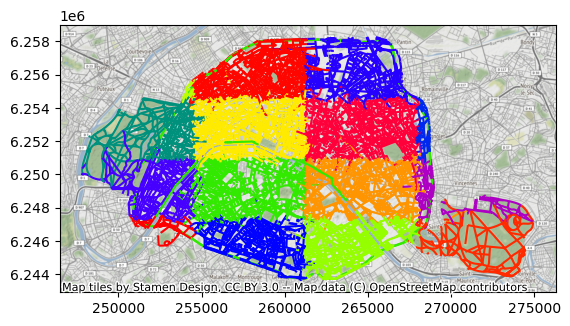

In [11]:
matrix = FinalUnique.plot(column='grid',cmap='prism')
cx.add_basemap(matrix, crs=FinalUnique.crs.to_string())

In [ ]:
# Construct grid and assign gridnumbers
gridX, gridY = create_grid(4,4,rich_data)
assign_gridnumber(rich_data, gridX, gridY)

In [ ]:
# Visualize Grid
matrix = rich_data.plot(column='grid',cmap='prism')
cx.add_basemap(matrix, crs=rich_data.crs.to_string())

In [ ]:
# function that creates dataframe with all jobs for a given bin and assigns jobs to that bin
def get_change_over_years(df, yearcolumn="annee_bin"):
    pivot = pd.pivot_table(df, values= "rue", index= "tags", columns = yearcolumn, aggfunc="count")
    pivot = pivot.fillna(0)
    pivot = pivot.iloc[1:,1:]
    pivot_rel = pivot.apply(lambda col: col/sum(col))
    change_year = []
    for year in range(1, len(pivot_rel.columns)):
        dif = sum(abs(pivot_rel.iloc[:,year] - pivot_rel.iloc[:,year-1]))/2
        change_year.append(dif)
    return(change_year, pivot.columns[1:])

In [ ]:
change_year, years = get_change_over_years(grid1, yearcolumn="annee")

In [ ]:
plt.bar(years,change_year)